<a href="https://colab.research.google.com/github/NFalah25/ML-Naufal3A/blob/main/Modul-9/Praktikum_Tugas_Pertemuan%209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama : Naufal Falah Wafiuddin
# Kelas : TI - 3A
# Absen : 23
# NIM : 2141720129

# Praktikum 1

Klasifikasi Iris dengan Perceptron

### Langkah 1 - Import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Langkah 2 - Load Data dan Visualisasi

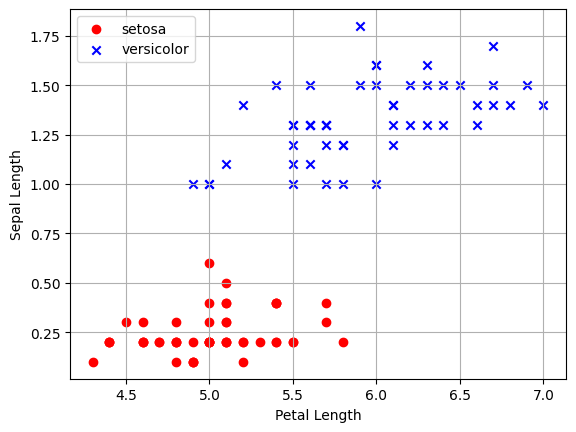

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

### Langkah 3 - Membuat Kelas Perceptron

In [ ]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Langkah 4 - Pilih Data dan Encoding Label

In [ ]:
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

### Langkah 5 - Fitting Model

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

### Langkah 6 - Visualisasi Nilai Error Per Epoch

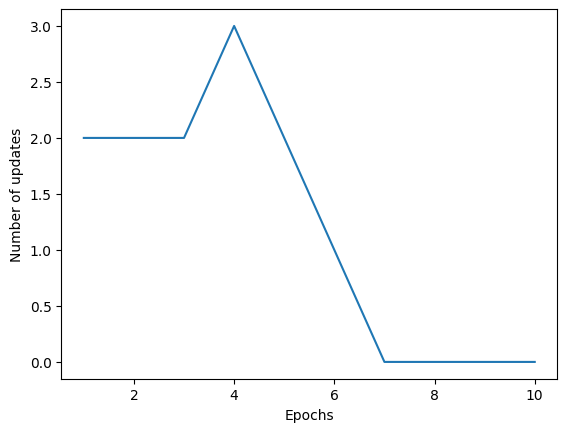

In [ ]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

### Langkah 7 - Visualisasi Decision Boundary

C:\Users\Naufal\AppData\Local\Temp\ipykernel_22632\1476757907.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


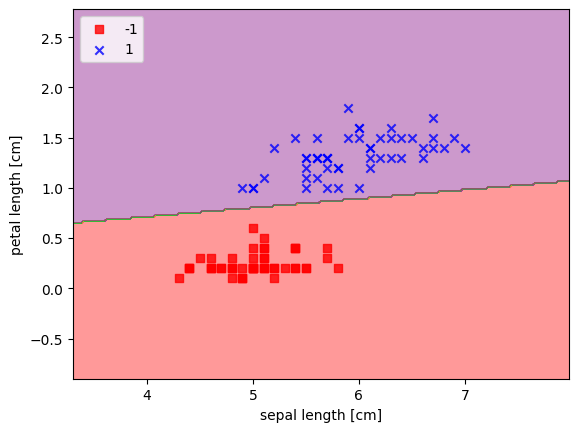

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Setup marker generator and colormap
    markers = ('s', 'x', 'o', '^', 'v')
    custom_colors = ['#FF0000', '#0000FF', '#00FF00', '#FFFF00', '#800080']
    cmap = ListedColormap(custom_colors)

    # Plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # Use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # Draw the contour using matplotlib with the specified colormap
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

# Call the function with the desired colormap
plot_decision_regions(X, y, ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()


# Praktikum 2

Klasifikasi Berita dengan Perceptron

### Langkah 1 - Import Library

In [ ]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

### Langkah 2 - Pilih Label dan Split Data

In [ ]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

### Langkah 3 - Ekstrak Fitur dan Buat Model Perceptron

In [ ]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



# Praktikum 3

Nilai Logika XOR dengan MLP

### Langkah 1 - Import Library

In [ ]:
from sklearn.neural_network import MLPClassifier

### Langkah 2 - Buat Data

In [ ]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

### Langkah 3 - Fit Model

In [ ]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

### Langkah 4 - Prediksi

In [ ]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


# Praktikum 4

Klasifikasi dengan ANN

### Langkah 1 - Import Library

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

### Langkah 2 - Load Data

In [ ]:
dataset = pd.read_csv('data/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

Cek data (X)

In [ ]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


### Langkah 3 - Encoding Data Kategorikal

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

Cek data (X) dengan print. Hasilnya

In [ ]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


### Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Langkah 5 - Split Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Langkah 6 - Scaling Fitur

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Membuat Model ANN

### Langkah 1 - Inisiasi model ANN

In [ ]:
ann = tf.keras.models.Sequential()

### Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Langkah 3 - Membuat Hidden Layer Kedua

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Langkah 4 - Membuat Output Layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training Model

### Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Langkah 2 - Fitting Model

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100


250/250 [==============================] - 2s 2ms/step - loss: 0.5332 - accuracy: 0.7886
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4557 - accuracy: 0.7985
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4278 - accuracy: 0.8036
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4123 - accuracy: 0.8065
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4003 - accuracy: 0.8094
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3902 - accuracy: 0.8136
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3822 - accuracy: 0.8156
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3764 - accuracy: 0.8169
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3724 - accuracy: 0.8188
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3691 - accuracy: 0.8332
E

### Modelkan Data Baru dan Buat Prediksi

In [ ]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 194ms/step
[[False]]


hasil yang didapatkan adalah 'False'

### Prediksi Dengan Data Testing

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Cek Akurasi dan Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1521   74]
 [ 198  207]]


0.864

# Tugas

#### Nama Kelompok


1.
2. Dandy Wahyu Syahputra  (2141720002)
3. Jauhar Maulana A'la    (2141720186)
4. Naufal Falah Wafiuddin (2141720129)
5. Sabbaha Naufal Erwanda (2141720221)



* Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
* Anda diperbolehkan melakukan eksplorasi terhadap,
  * Metode pra pengolahan
  * Pemilihan fitur
  * Arsitektur ANN
  * Fungsi Aktiviasi
* ANN diimplementasikan dengan menggunakan tensorflow


* **DIKERJAKAN SECARA BERKELOMPOK**
* **JELASKAN HASIL YANG ANDA DAPATKAN,**
  * **AKURASI**
  * **CONFUSION MATRIX**
  * **KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN**

In [ ]:
# Import library yang dibutuhkan
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision

In [ ]:
# Download dataset MNIST menggunakan torchvision
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
mnist_dataset = torchvision.datasets.MNIST(root='data', train=True, transform=transform, download=True)

100.0%


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw


100.0%


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw




7.9%

100.0%


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw



100.0%

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



In [ ]:
# Ekstrak data dan label
data = mnist_dataset.data
labels = mnist_dataset.targets

Epoch 1/10
750/750 [==============================] - 5s 4ms/step - loss: 0.3094 - accuracy: 0.9114 - val_loss: 0.1689 - val_accuracy: 0.9503
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1317 - accuracy: 0.9615 - val_loss: 0.1118 - val_accuracy: 0.9682
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0904 - accuracy: 0.9729 - val_loss: 0.1064 - val_accuracy: 0.9679
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0666 - accuracy: 0.9804 - val_loss: 0.0999 - val_accuracy: 0.9695
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0543 - accuracy: 0.9827 - val_loss: 0.0906 - val_accuracy: 0.9711
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0408 - accuracy: 0.9869 - val_loss: 0.0864 - val_accuracy: 0.9759
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0330 - accuracy: 0.9895 - val_loss: 0.0907 - val_accuracy: 0.9749
Epoch 

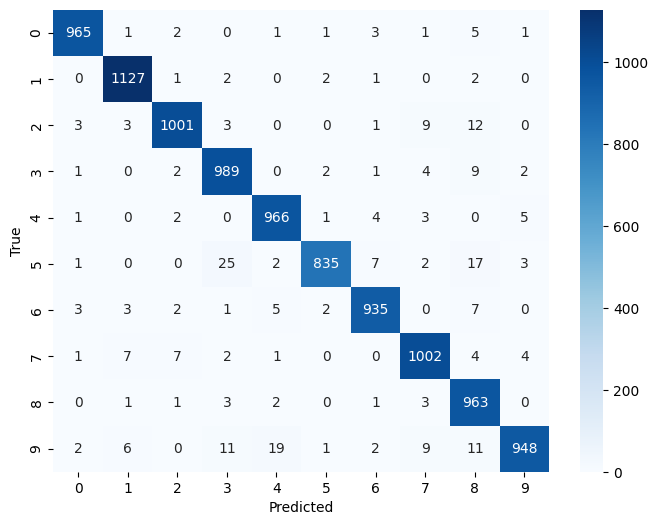

In [ ]:
# Pra-pemrosesan data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0  # Normalisasi data
test_images = test_images / 255.0
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Membangun model ANN
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Layer input
    layers.Dense(128, activation='relu'),   # Hidden layer 1 dengan aktivasi ReLU
    layers.Dense(64, activation='relu'),    # Hidden layer 2 dengan aktivasi ReLU
    layers.Dense(10, activation='softmax')  # Layer output dengan aktivasi softmax
])

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Evaluasi model pada data pengujian
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Akurasi pengujian:", test_acc)

# Prediksi kelas
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Matriks kebingungan
true_labels = np.argmax(test_labels, axis=1)
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Plot matriks kebingungan
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
